# Programa Ingenias+ Data Science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import sklearn

In [3]:
# Chequeamos nuestra version
sklearn.__version__

'1.6.1'

In [10]:
url = 'https://raw.githubusercontent.com/valentinafalco/ProyectoFinal-DS-YPF/main/2da%20PreEntrega/rendimientos-hospitalarios_2005-2022.csv'

#AL LEER EL ARCHIVO ENCONTRAMOS QUE LA LINEA 988 TIENE UNA CANTIDAD INCONSISTENTE DE DATOS, UNA DE LAS COLUMNAS TIENE UN DELIMITADOR ERRONEO
# SOLUCION:
# sep=';'o sep='\t': El código ahora incluye otros delimitadores como ';'.
# on_bad_lines='skip'Este argumento indica al analizador que omita las líneas que causan errores durante el análisis. Es útil para gestionar situaciones en las que algunas líneas tienen formatos inesperados y no se desea que detengan todo el proceso de carga .

rendimientos_hospitalarios = pd.read_csv(url, sep=';', on_bad_lines='skip')

# Alternatively, specify the 'error_bad_lines=False' to skip problematic lines
# rendimientos_hospitalarios = pd.read_csv(url, error_bad_lines=False)

# Inspect the data after loading to identify and address the specific issue
rendimientos_hospitalarios.head()

,anio,region_sanitaria,municipio_id,municipio_nombre,establecimiento_id,establecimiento_nombre,dependencia,consultas_odontologicas,consultas_medicas,consultas_paramedicas,...,egresos,dias_camas_disponible,promedio_camas_disponibles,pacientes_dias,porcentaje_ocupacion,dias_estadia,promedio_dias_estadia,defunciones,giro_de_camas,tasa_mortalidad_hospitalaria
0,2005,I,60007,Adolfo Alsina,NaN,Hospital Local General José de San Martín,Municipal,6424.0,94401.0,18888.0,...,1474.0,10963.0,30.0,4798.0,44.0,4529.0,3.0,42.0,49.0,3.0
1,2005,I,60007,Adolfo Alsina,NaN,Hospital Dr. Noe Yarcho,Municipal,4493.0,18370.0,4459.0,...,471.0,10950.0,30.0,2184.0,20.0,2027.0,4.0,20.0,16.0,4.0
2,2005,I,60007,Adolfo Alsina,NaN,Hogar de Ancianos General N. Levalle,Municipal,0.0,0.0,0.0,...,2.0,12740.0,35.0,11371.0,89.0,848.0,424.0,1.0,0.0,50.0
3,2005,I,60007,Adolfo Alsina,NaN,Hospital Demetrio Carmelo Loyarte,Municipal,0.0,2024.0,846.0,...,120.0,6570.0,18.0,278.0,4.0,279.0,2.0,1.0,7.0,1.0
4,2005,I,60007,Adolfo Alsina,NaN,Unidad Sanitaria San Miguel Arcangel,Municipal,3086.0,2196.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
rendimientos_hospitalarios.head()

,anio,region_sanitaria,municipio_id,municipio_nombre,establecimiento_id,establecimiento_nombre,dependencia,consultas_odontologicas,consultas_medicas,consultas_paramedicas,...,egresos,dias_camas_disponible,promedio_camas_disponibles,pacientes_dias,porcentaje_ocupacion,dias_estadia,promedio_dias_estadia,defunciones,giro_de_camas,tasa_mortalidad_hospitalaria
0,2005,I,60007,Adolfo Alsina,NaN,Hospital Local General José de San Martín,Municipal,6424.0,94401.0,18888.0,...,1474.0,10963.0,30.0,4798.0,44.0,4529.0,3.0,42.0,49.0,3.0
1,2005,I,60007,Adolfo Alsina,NaN,Hospital Dr. Noe Yarcho,Municipal,4493.0,18370.0,4459.0,...,471.0,10950.0,30.0,2184.0,20.0,2027.0,4.0,20.0,16.0,4.0
2,2005,I,60007,Adolfo Alsina,NaN,Hogar de Ancianos General N. Levalle,Municipal,0.0,0.0,0.0,...,2.0,12740.0,35.0,11371.0,89.0,848.0,424.0,1.0,0.0,50.0
3,2005,I,60007,Adolfo Alsina,NaN,Hospital Demetrio Carmelo Loyarte,Municipal,0.0,2024.0,846.0,...,120.0,6570.0,18.0,278.0,4.0,279.0,2.0,1.0,7.0,1.0
4,2005,I,60007,Adolfo Alsina,NaN,Unidad Sanitaria San Miguel Arcangel,Municipal,3086.0,2196.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Verificamos si tenemos datos faltantes:


In [13]:
rendimientos_hospitalarios.isna().sum()

,0
anio,0
region_sanitaria,0
municipio_id,0
municipio_nombre,0
establecimiento_id,27522
establecimiento_nombre,0
dependencia,0
consultas_odontologicas,5590
consultas_medicas,1039
consultas_paramedicas,3031


ANÁLISIS DE DATOS FALTANTES:

1) La columna establecimiento_id: se conservará la columna y se completará con un id que identifique de manera unívoca a cada establecimiento hospitalario. Será una variable numérica y serial por orden alfabético de acuerdo al nombre del establecimiento (sin duplicados).

2) Las columnas consultas_odontologicas, consultas_medicas, consultas_paramedicas, interconsultas, egresos, dias_camas_disponible, pacientes_dias, dias_estadia, defunciones, giro_de_camas se conservarán como dato aunque se encuentre en cero lo que significará para el análisis que nunca se produjeron las mismas en un establecimiento específico.

3) Las columnas: promedio_camas_disponibles, porcentaje_ocupacion, porcentaje_ocupacion, tasa_mortalidad_hospitalaria se reemplazarán por la herramienta estadística media.

4) Se eliminarán las filas que contengan datos duplicados (FALTA EVALUAR)

¿Cuanto representa esos valores faltantes?

**¿Que debo preguntarme al manejar datos faltantes?**

- ¿Quiero conservar la información?
- ¿Qué tipo de datos tengo en la columna que voy a imputar?
- ¿Por qué puede ser que tengo los valores faltantes?:
    - Valores faltantes al azar
    - Valores faltantes no al azar
- Si es una variable numerica continua, ¿Que distribución tiene?

**¿Como decido que hago con los valores faltantes?**

- Entender que no hay una manera _perfecta_ de manejar los valores faltantes.

- Depende de mis datos

- Observar no solo la cantidad de datos faltantes sino también su patrón.

- Estrategias:  
     - **Eliminar los valores**:
        - Si la recogida de datos no se ha realizado de forma aleatoria introduce sesgo.  
        - En el caso de que haya mucho patrones con datos faltantes, podría reducir considerablemente la cantidad de filas disponibles.
     - **Eliminación de la variable (columna)**:
         - Las variables “descartadas” podrían contener información de vital importancia.      
     - **Imputar los valores**:
        - Sustituir por media o mediana: Solo en variables numericas  
        - Sustituir por valor mas frecuente: Util para variables categoricas
        - Algoritmo de ML: K-NN (k-nearest neighboors)

A) Si optamos por eliminar los datos, puedemos hacerlo usando la siguiente función:
    
`.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)`

- **axis**: {0, 1}, default 0. 0: Filas, 1: Columnas
- **how**: {'any', 'all'}, default 'any'. Any: Si hay un valor faltante elimina la columna o fila. All: Si todos los valores de la fila o columna son faltantes, elimina la fila o columna.
- **subset**: Nombre de filas o columnas donde buscar valores faltantes
- **inplace**: True modifica el DataFrame original

[documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [ ]:
blackfriday_drop = blackfriday.dropna()

In [ ]:
blackfriday_drop.shape

(166821, 12)

In [ ]:
blackfriday.dropna(how='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
blackfriday.dropna(subset=['Gender'])

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
blackfriday.dropna(subset=['Age', 'Gender'])

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


B) Si optamos por imputar los datos, podemos hacerlo usando la siguiente función:
    
`sklearn.impute.SimpleImputer(missing_values=nan, strategy=’mean’, fill_value=None, copy=True, add_indicator=False)`
    
- **missing_values**: Indica como son representados los valores faltantes (np.nan es el estandard)
- **strategy**: `mean`, `median`, `most_frequent`, `constant`.
- **fill_value**: Si uso `constant`, puedo usar `fill_value` para indicar por cuál valor debe ser reemplazado
- **copy**: Si pongo True, crea una copia de X
- **add_indicator**: Agrega un indicador para los valores faltantes.


[documentación](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

In [14]:
from sklearn.impute import SimpleImputer

**Variable: `City_Category`**

<ipython-input-22-30b94a7a165c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Occupation", data=blackfriday, palette="Set3")


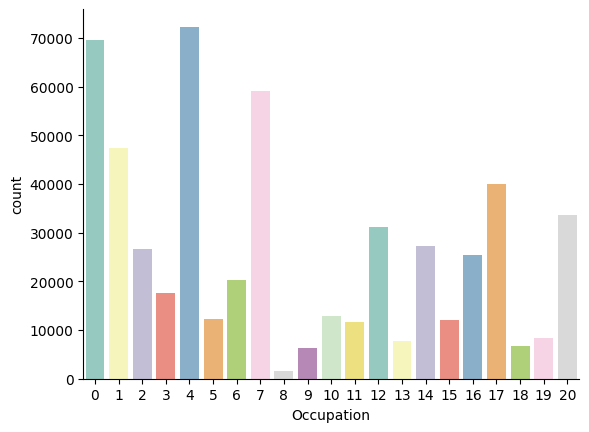

In [ ]:
sns.countplot(x="Occupation", data=blackfriday, palette="Set3")
sns.despine()

In [ ]:
blackfriday['Occupation'].value_counts()

,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043
20,33562
12,31179
14,27309
2,26588


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [ ]:
blackfriday_imputados = imputer.fit_transform(blackfriday[['Occupation']])

In [ ]:
np.shape(blackfriday_imputados)

(550068, 1)

In [ ]:
blackfriday_imputados[:10]

array([[10],
       [10],
       [10],
       [10],
       [16],
       [15],
       [ 7],
       [ 7],
       [ 7],
       [20]])

In [ ]:
blackfriday["Occupation"] = blackfriday_imputados

In [ ]:
blackfriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
blackfriday['Occupation'].value_counts()

,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043
20,33562
12,31179
14,27309
2,26588


**Variable: `Age`**

In [ ]:
blackfriday['Age'].describe()

,Age
count,550068
unique,7
top,26-35
freq,219587


In [ ]:
imputer_age = SimpleImputer(missing_values=np.nan, strategy="mean")

In [ ]:
# Convertir la columna 'Age' de string a entero
# Ver el tipo de dato de una columna específica
print(blackfriday['Age'].dtype)

object


In [ ]:
blackfriday['Age'].describe()

,Age
count,550068
unique,7
top,26-35
freq,219587


**Variable: `Gender`**

In [ ]:
blackfriday['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


In [ ]:
imputer_gen = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [ ]:
blackfriday['Gender'] = imputer_gen.fit_transform(blackfriday[['Gender']]).ravel()

In [ ]:
blackfriday['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


**Variable `Purchase`**

In [ ]:
blackfriday.dropna(subset=['Purchase'], inplace=True)

**Columnas `Product_Category_2` and `Product_Category_3`**

In [ ]:
blackfriday.drop(['Product_Category_2', 'Product_Category_3'], axis=1, inplace=True)

In [ ]:
blackfriday.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Purchase,0


#### DETECCION DE OUTLIERS

- Manera de detectar outliers:
    - z-score
        - Considera que todo valor que se aleje mucho de la media=0 es un outlier.
        - Depende de la media y el desvio estandard para medir la centralidad y dispersión, los cuales son muy afectados por outliers. Si las variables no tiene una distribución normal, termino removiendo muchos outliers del dataset.
        - No funciona bien en dataset muy pequeños.
    - Rango Intercuartil:
        - Es robusto y no es tan sensible a outliers.

In [ ]:
blackfriday.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Purchase,int64


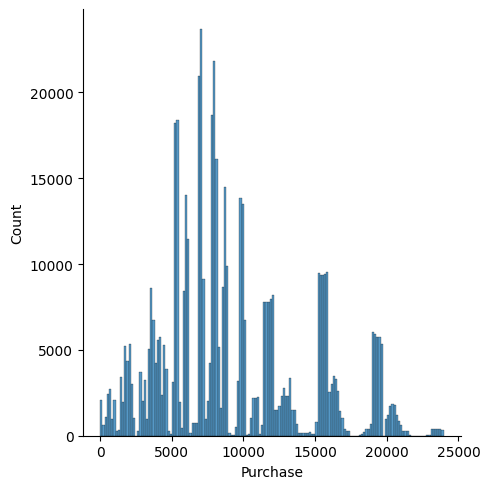

In [ ]:
sns.displot(blackfriday['Purchase'])
sns.despine()

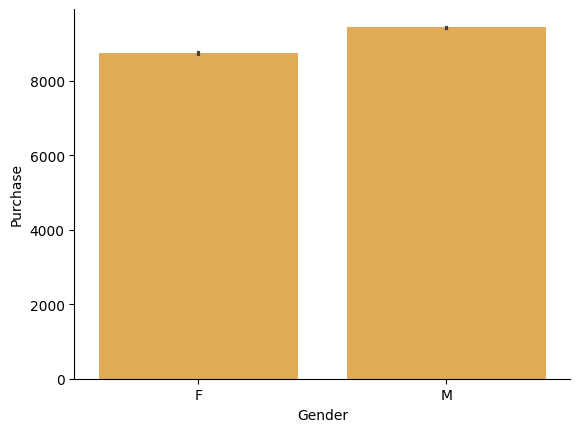

In [ ]:
ax = sns.barplot(x='Gender', y='Purchase', data=blackfriday, color='#F5B041')
sns.despine()

In [ ]:
z = stats.zscore(np.array(blackfriday['Purchase']))

In [ ]:
threshold = 2.0

In [ ]:
z_index = blackfriday['Purchase'][np.abs(z) < threshold].index

blackfriday_withzscore = blackfriday.loc[z_index]

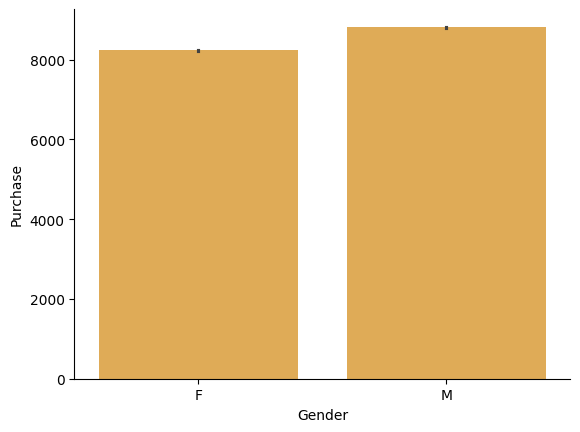

In [ ]:
sns.barplot(x='Gender', y='Purchase', data=blackfriday_withzscore, color='#F5B041')
sns.despine()

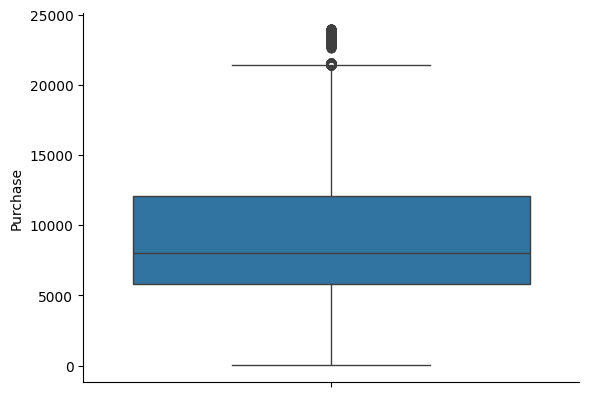

In [ ]:
sns.boxplot(blackfriday['Purchase'])
sns.despine()

In [ ]:
q1 = blackfriday['Purchase'].quantile(0.25)
q3 = blackfriday['Purchase'].quantile(0.75)

In [ ]:
iqr = q3 - q1
lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)

In [ ]:
bf = blackfriday[(blackfriday['Purchase'] > lb) & (blackfriday['Purchase'] < ub)]

In [ ]:
bf.reset_index(drop=True, inplace=True)

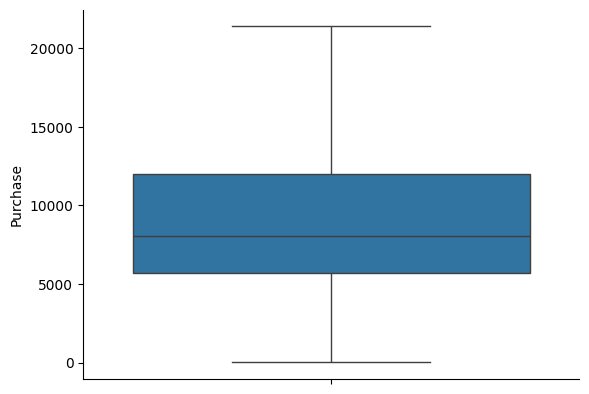

In [ ]:
sns.boxplot(bf['Purchase'])
sns.despine()